# Lab6 - Interpolacja

Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji.

In [1]:
function Lagrange(X, Y, n, x_k)
    result = 0
    for k = 1:n
        y_k = Y[k]
        L_k = 1
        for i = 1:n
            if i != k
                L_k *= (x_k - X[i])/(X[k] - X[i])
            end
        end
        result += L_k * y_k
    end
    result
end           

Lagrange (generic function with 1 method)

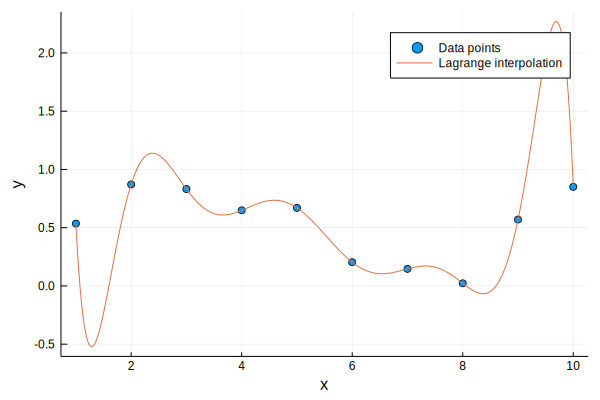

In [2]:
using Plots, Polynomials

n = 10
xs = 1:1:n
X = [x for x in xs]
Y = [rand() for x in xs]

scatter(X, Y, label="Data points")

xsf = 1:0.01:n

AfterLagrange = [Lagrange(X,Y,n,x) for x in xsf]
plot!(xsf, AfterLagrange, label="Lagrange interpolation", xlabel="x", ylabel="y")

Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

In [3]:
function DividedDifferences(X, Y, n)
    A = zeros(n)
    A[1] = Y[1]
    for i = 2:n # wyliczamy i-te współczynniki a
        A[i] = Y[i] - A[1]
        for j = 2:i-1 # j-te z kolei a
            a_j = A[j]
            for k = 1:j-1 # mnożymy j-te a przez (x_i-x_1)*(x_i-x_2)*...*(x_i-x_j-1)
                a_j *= X[i] - X[k]
            end
            A[i] -= a_j
        end
        for j = 1:i-1 # dzielimy przez (x_i-x_1)*(x_i-x_2)*...*(x_i-x_i-1)
            A[i] /= X[i] - X[j]
        end
    end
    A
end

function Newton(X, A, n, x)
    result = 0
    result += A[1]
    for i = 2:n
        res_i = A[i]
        for j = 1:i-1
            res_i *= x - X[j]
        end
        result += res_i
    end
    result
end

Newton (generic function with 1 method)

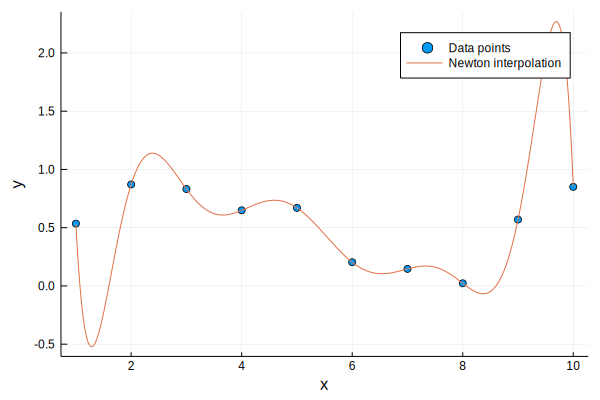

In [4]:
using Plots, Polynomials

Z=Y
scatter(X, Z, label="Data points")

A = DividedDifferences(X,Z,n)
AfterNewton = [Newton(X,A,n,x) for x in xsf]
plot!(xsf, AfterNewton, label="Newton interpolation", xlabel="x", ylabel="y")

Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z funkcji gsl_interp_polynomial z pakietu GSL (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

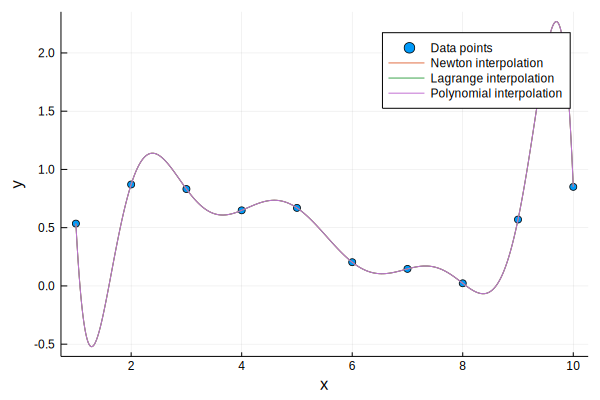

In [5]:
using Polynomials
fit1=polyfit(X, Y)
AfterPolyfit=[fit1(x) for x in xsf]
plot!(xsf, AfterLagrange, label="Lagrange interpolation", xlabel="x", ylabel="y")
plot!(xsf, AfterPolyfit, label="Polynomial interpolation")

Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego. Narzedzie do analizy danych do wyboru (Julia, R)

In [9]:
using DataFrames, Polynomials
Type = []
Dim = Int[]
Time = Float64[]

for i = 10:10:200
    for step = 1:10
        xss = 1:1:i
        A = [x for x in xss]
        B = [rand() for x in xss]
        xsff = 1:0.01:i
        
        push!(Type, "L")
        push!(Dim, i) 
        L = [Lagrange(A,B,i,x) for x in xsff]
        push!(Time, @elapsed L)
        
        push!(Type, "N")
        push!(Dim, i)
        D = DividedDifferences(A,B,i)
        N = [Newton(A,D,i,x) for x in xsff]
        push!(Time, (@elapsed D) + (@elapsed N))
        
        push!(Type, "P")
        push!(Dim, i)
        fit1=polyfit(A, B)
        P = [fit1(x) for x in xsff]
        push!(Time, (@elapsed P) + (@elapsed fit1))
    end
end

In [10]:
using Statistics
df = DataFrame()
df[:Type] = Type
df[:Dim] = Dim
df[:Time] = Time
df[:Time] = Time * 10e6

d=by(df, [:Type, :Dim], timeMean = :Time => mean, std = :Time => std)
d

,Type,Dim,timeMean,std
,Any,Int64,Float64,Float64
1,L,10,3.998,3.2958
2,N,10,6.102,3.06951
3,P,10,5.103,2.96639
4,L,20,4.597,1.83475
5,N,20,5.502,1.50709
6,P,20,7.595,1.50705
7,L,30,7.402,1.77402
8,N,30,8.2,5.24617
9,P,30,9.101,1.6653


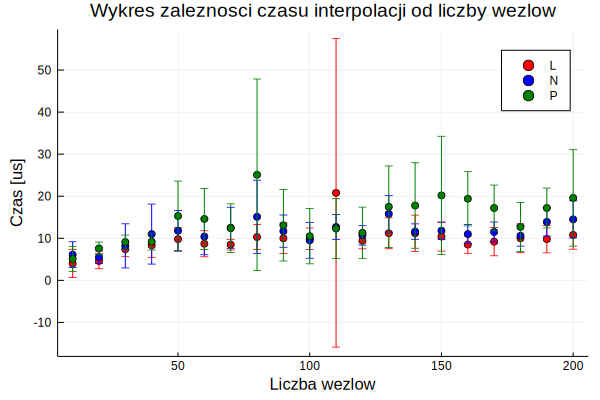

In [11]:
using Plots
scatter(d[:Dim], d[:timeMean], group=d[:Type], color=[:red :blue :green], yerr=d[:std], titlefontsize=13,
    title="Wykres zaleznosci czasu interpolacji od liczby wezlow", xaxis=("Liczba wezlow"),yaxis=("Czas [us]"))

Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.

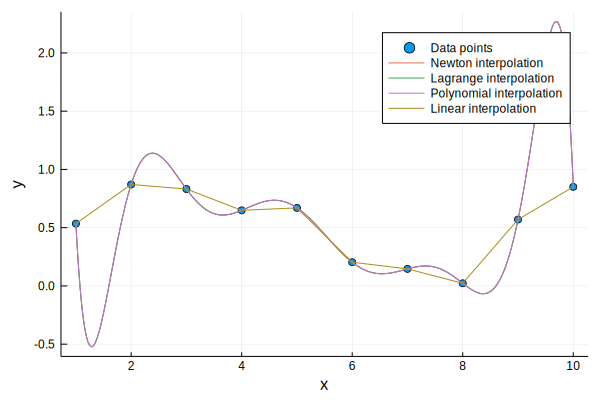

In [6]:
#interpolacja liniowa
using Interpolations
interp_linear = LinearInterpolation(X, Y)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="Linear interpolation")

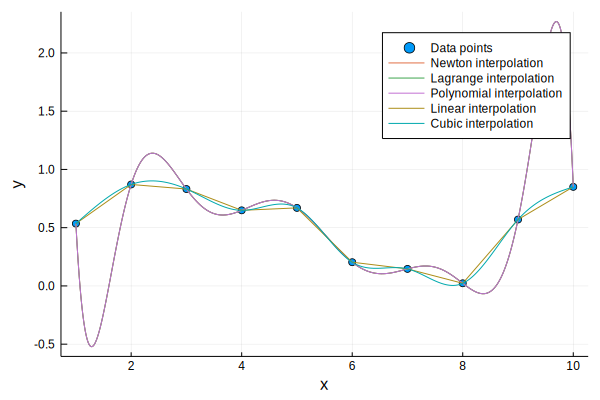

In [7]:
# interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, Y)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="Cubic interpolation")

Zademonstrowac efekt Rungego.

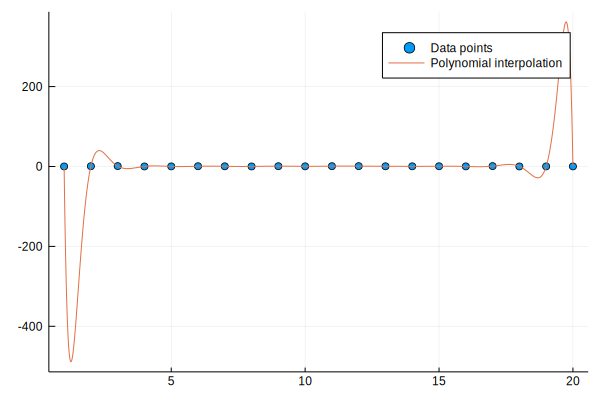

In [8]:
xs = 1:20
X = [x for x in xs]
Y = [rand() for x in xs]
scatter(X, Y, label="Data points")

xsf = 1:0.01:20
fit1=polyfit(X, Y)
AfterPolyfit=[fit1(x) for x in xsf]
plot!(xsf, AfterPolyfit, label="Polynomial interpolation")